# Exploratory Data Analysis

For this project, we used the dataset `MovieLens-1M` from the MovieLens [website](https://movielens.org). This includes 1 million ratings from 6000 users on 4000 movies. There are three tables from this dataset: 
- `Ratings`
- `Movies`
- `Users`

---

In [33]:
# import packages
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [36]:
# read the data file
ratings_df = pd.read_csv('./data/ratings.dat', sep = "::", 
                        names = ['UserID', 'MovieID', 'Rating', 'Timestamp'], 
                        engine='python')

movies_df = pd.read_csv('./data/movies.dat', sep = "::", 
                        names = ['MovieID', 'Title', 'Genres'], 
                        engine='python', encoding="ISO-8859-1")

users_df = pd.read_csv('./data/users.dat', sep = "::", 
                        names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'], 
                        engine='python')

--- 

### `Ratings` Table
This table includes information about users who rate the movie, their rating, and the time when they did it.

In [8]:
ratings_df.head(5)

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


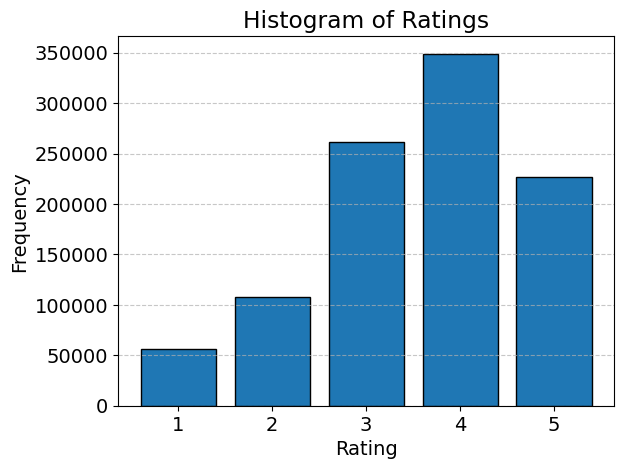

In [41]:
plt.hist(ratings_df["Rating"], bins=range(1, 7), edgecolor='black', align='left', rwidth=0.8)
plt.title("Histogram of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(range(1, 6))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The majority of users rated movies highly, as ratings of 4 and 5 dominate the chart, suggesting a generally positive sentiment toward the movies in the dataset.

In [7]:
print(ratings_df['UserID'].value_counts())
print(ratings_df['MovieID'].value_counts())

UserID
4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
        ... 
5725      20
3407      20
1664      20
4419      20
3021      20
Name: count, Length: 6040, dtype: int64
MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64


User `4169` rated the most out of the users, with 2314 ratings. In addition, all the users in this dataset are guaranteed to rate at least 20 movies.

---

### `Movies` table
This table includes information about the movies and their genre.

In [9]:
movies_df.head(5)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
print("Total Number of Movies:", len(movies_df['MovieID']), 'movies')

Total Number of Movies: 3883 movies


In [24]:
# Get the total number of genres
dict_genre = {}

for i, value in movies_df.iterrows():
    genre_list = value['Genres'].split('|')
    for j in range(len(genre_list)):
        if genre_list[j] not in dict_genre:
            dict_genre[genre_list[j]] = 1
        else:
            dict_genre[genre_list[j]] += 1

In [25]:
dict_genre

{'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Adventure': 283,
 'Fantasy': 68,
 'Romance': 471,
 'Drama': 1603,
 'Action': 503,
 'Crime': 211,
 'Thriller': 492,
 'Horror': 343,
 'Sci-Fi': 276,
 'Documentary': 127,
 'War': 143,
 'Musical': 114,
 'Mystery': 106,
 'Film-Noir': 44,
 'Western': 68}

In [27]:
movies_df["num_genres"] = movies_df["Genres"].apply(lambda x: len(x.split('|')))
movies_df["num_genres"].value_counts()

num_genres
1    2025
2    1322
3     421
4     100
5      14
6       1
Name: count, dtype: int64

Most of the movies belong to only 1 genre. Only 1 movie has 6 genres.

---

### `Users` Table
This table includes information about the users, which are gender, age, occupation, and zip-code.


In [30]:
users_df.head(5)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [31]:
users_df['Gender'].value_counts()

Gender
M    4331
F    1709
Name: count, dtype: int64

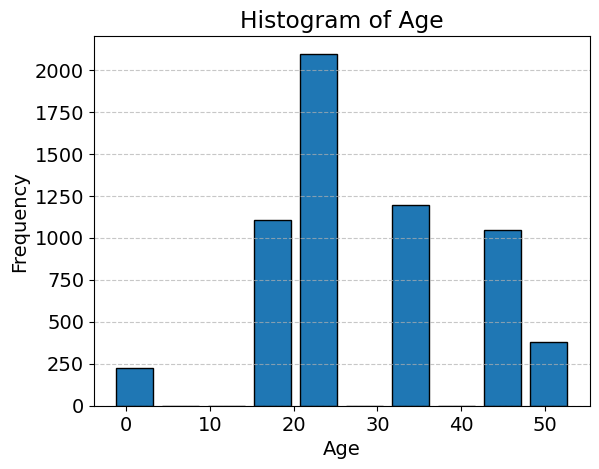

In [45]:
plt.hist(users_df["Age"], edgecolor='black', align='left', rwidth=0.8)
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The majority of users are between the ages of 18 and 34, with the under 18 age group having the smallest number of users.

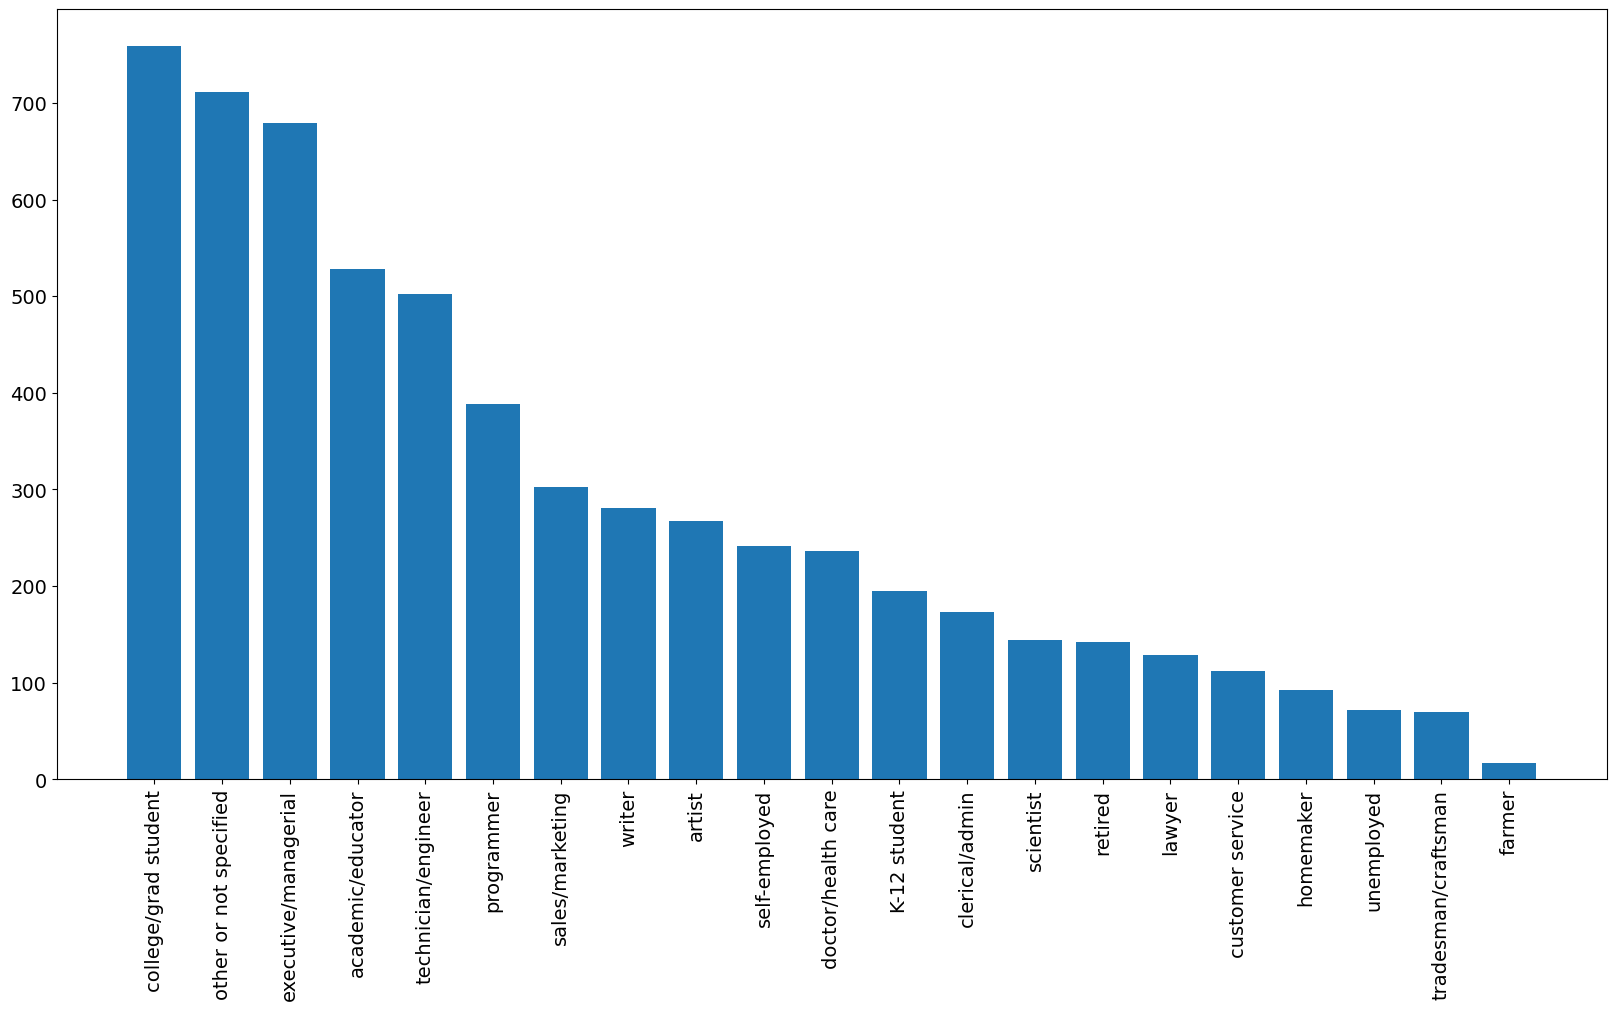

In [38]:
# label the occupation code with the correct names
occupation_mapping = {
    0: "other or not specified",
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer",
}

occupation_id_count = users_df["Occupation"].value_counts().to_dict()
occupation_count = {
    occupation_mapping[id]: count for id, count in occupation_id_count.items()
}

plt.figure(figsize=(20, 10))
plt.bar(x=occupation_count.keys(), height=occupation_count.values())
plt.xticks(rotation=90)
plt.show()

---